In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys

dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path:
    sys.path.append(dir1)

os.chdir('..')

In [14]:
from utils import metrics
from utils.ensembles import EnsembleCPDModel, CusumEnsembleCPDModel

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader, Dataset

import yaml

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# BCE HAR

In [4]:
model_type = "seq2seq"
experiments_name = "human_activity"

path_to_config = "configs/" + experiments_name + "_" + model_type + ".yaml"

with open(path_to_config, 'r') as f:
    args_config = yaml.safe_load(f.read())

args_config["experiments_name"] = experiments_name
args_config["model_type"] = model_type
args_config["loss_type"] = "bce"
args_config["num_workers"] = 2
args_config["learning"]["gpus"] = 1
args_config["learning"]["epochs"] = 100

In [ ]:
ens_bce = EnsembleCPDModel(args_config, n_models=10, boot_sample_size=None)
ens_bce.load_models_list("saved_models/bce/human_activity/full_sample")

In [ ]:
test_dataset = ens_bce.test_dataset
test_dataloader = DataLoader(test_dataset, batch_size = args_config["learning"]["batch_size"], shuffle=True)

In [7]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

seed = 0

# compute metrics
metrics_local, (_, _), delay_list, fp_delay_list = \
    metrics.evaluation_pipeline(ens_bce,
                                test_dataloader,
                                threshold_list,
                                device="cpu", # choose 'cpu' or 'cuda' if available
                                model_type="ensemble",
                                verbose=True,
                                margin_list=[1, 2, 4]
                                )

  5%|▍         | 1/21 [00:00<00:02,  9.47it/s]

Collectting model's outputs


100%|██████████| 21/21 [00:01<00:00, 15.55it/s]


TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1306, FN: 0, TP: 31, DELAY:0.0, FP_DELAY:0.052356019616127014, COVER: 0.6693305908750935
TN: 1, FP: 939, FN: 0, TP: 397, DELAY:0.0, FP_DELAY:2.6335079669952393, COVER: 0.7798021087729445
TN: 2, FP: 670, FN: 0, TP: 665, DELAY:0.0, FP_DELAY:5.219895362854004, COVER: 0.8735963463658389
TN: 6, FP: 582, FN: 0, TP: 749, DELAY:0.0, FP_DELAY:5.987285137176514, COVER: 0.9046518215099232
TN: 7, FP: 530, FN: 0, TP: 800, DELAY:0.0, FP_DELAY:6.463724613189697, COVER: 0.9186335070703189
TN: 11, FP: 489, FN: 0, TP: 837, DELAY:0.0, FP_DELAY:6.753178596496582, COVER: 0.929502798735339

# TS-CP HAR

In [3]:
model_type = "tscp"
experiments_name = "human_activity"

path_to_config = "configs/" + experiments_name + "_" + model_type + ".yaml"

with open(path_to_config, 'r') as f:
    args_config = yaml.safe_load(f.read())

args_config["experiments_name"] = experiments_name
args_config["model_type"] = model_type
args_config["num_workers"] = 2
args_config["learning"]["gpus"] = 1
args_config["learning"]["epochs"] = 100

In [11]:
ens_tscp = EnsembleCPDModel(args_config, n_models=10, boot_sample_size=None)
ens_tscp.load_models_list(f"saved_models/tscp/human_activity/window_{args_config['model']['window']}")

In [12]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

seed = 0

# compute metrics
metrics_local, (_, _), delay_list, fp_delay_list = \
    metrics.evaluation_pipeline(
        ens_tscp,
        test_dataloader,
        threshold_list,
        device="cpu", # choose 'cpu' or 'cuda' if available
        model_type="ensemble",
        verbose=True,
        margin_list=[1, 2, 4]
    )

  0%|          | 0/21 [00:00<?, ?it/s]

Collectting model's outputs


100%|██████████| 21/21 [01:38<00:00,  4.68s/it]


TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 10, FP: 1237, FN: 0, TP: 90, DELAY:0.03141361102461815, FP_DELAY:5.166043281555176, COVER: 0.7580632948982825
TN: 14, FP: 1229, FN: 0, TP: 94, DELAY:0.03290949761867523, FP_DELAY:5.344053745269775, COVER: 0.7628170459225037
TN: 21, FP: 1206, FN: 0, TP: 110, DELAY:0.034405384212732315, FP_DELAY:5.531039714813232, COVER: 0.7688685113377497
TN: 25, FP: 1201, FN: 0, TP: 111, DELAY:0.0359012708067894, FP_DELAY:5.674644947052002, COVER: 0.7714671809240422
TN: 25, FP: 1197, FN: 0, TP: 115, DELAY:0.03739715740084648, FP_DELAY:5.78683614730835, COVER: 0.777289931481241
TN: 26, FP: 1193, FN: 1, TP: 117, DELAY:0.038893043994903564, FP_DELAY:5.917726039886475, COVER: 0.7820867282647344
TN: 27, FP: 1189, FN: 1, TP: 120, DELAY:0.04188481718301773, FP_DELAY:6.037397384643555, COVER: 0.7856447494443543
TN: 30, FP: 1185, FN: 1, TP: 121, DELAY:0.04263275861740112, FP_DELAY:6.226626873016357, COVER: 0.7916896136745417


# BCE Explosion

In [4]:
model_type = "seq2seq"
experiments_name = "explosion"

path_to_config = "configs/" + "video" + "_" + model_type + ".yaml"

with open(path_to_config, 'r') as f:
    args_config = yaml.safe_load(f.read())

args_config["experiments_name"] = experiments_name
args_config["model_type"] = model_type
args_config["loss_type"] = "bce"
args_config["num_workers"] = 2
args_config["learning"]["gpus"] = 1
args_config["learning"]["epochs"] = 100

In [5]:
ens_bce = EnsembleCPDModel(args_config, n_models=10, boot_sample_size=None)
ens_bce.load_models_list("saved_models/bce/explosion/layer_norm/train_anomaly_num_155")

In [6]:
test_dataset = ens_bce.test_dataset
test_dataloader = DataLoader(test_dataset, batch_size = args_config["learning"]["batch_size"], shuffle=True)

In [22]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

seed = 0

# compute metrics
metrics_local, (_, _), delay_list, fp_delay_list = \
    metrics.evaluation_pipeline(ens_bce,
                                test_dataloader,
                                threshold_list,
                                device="cuda", # choose 'cpu' or 'cuda' if available
                                model_type="ensemble",
                                verbose=True,
                                margin_list=[1, 2, 4]
                                )

  0%|          | 0/20 [00:00<?, ?it/s]

Collectting model's outputs


100%|██████████| 20/20 [02:38<00:00,  7.90s/it]


TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0

# TS-CP Explosion

In [7]:
model_type = "tscp"
experiments_name = "explosion"

path_to_config = "configs/" + "video" + "_" + model_type + ".yaml"

with open(path_to_config, 'r') as f:
    args_config = yaml.safe_load(f.read())

args_config["experiments_name"] = experiments_name
args_config["model_type"] = model_type
args_config["num_workers"] = 2
args_config["learning"]["gpus"] = 1
args_config["learning"]["epochs"] = 100

In [8]:
ens_tscp = EnsembleCPDModel(args_config, n_models=5, boot_sample_size=None)
ens_tscp.load_models_list("saved_models/tscp/explosion/")

Loading extractor...


Using cache found in /home/indid/.cache/torch/hub/facebookresearch_pytorchvideo_main


Loading extractor...


Using cache found in /home/indid/.cache/torch/hub/facebookresearch_pytorchvideo_main


Loading extractor...


Using cache found in /home/indid/.cache/torch/hub/facebookresearch_pytorchvideo_main


Loading extractor...


Using cache found in /home/indid/.cache/torch/hub/facebookresearch_pytorchvideo_main


Loading extractor...


Using cache found in /home/indid/.cache/torch/hub/facebookresearch_pytorchvideo_main


Loading extractor...


Using cache found in /home/indid/.cache/torch/hub/facebookresearch_pytorchvideo_main


Loading extractor...


Using cache found in /home/indid/.cache/torch/hub/facebookresearch_pytorchvideo_main


Loading extractor...


Using cache found in /home/indid/.cache/torch/hub/facebookresearch_pytorchvideo_main


Loading extractor...


Using cache found in /home/indid/.cache/torch/hub/facebookresearch_pytorchvideo_main


Loading extractor...


Using cache found in /home/indid/.cache/torch/hub/facebookresearch_pytorchvideo_main


In [9]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

seed = 0

# compute metrics
metrics_local, (_, _), delay_list, fp_delay_list = \
    metrics.evaluation_pipeline(
        ens_tscp,
        test_dataloader,
        threshold_list,
        device="cuda", # choose 'cpu' or 'cuda' if available
        model_type="ensemble",
        verbose=True,
        margin_list=[1, 2, 4]
    )

  0%|          | 0/20 [00:00<?, ?it/s]

Collectting model's outputs


100%|██████████| 20/20 [42:23<00:00, 127.18s/it]


TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 27, FP: 287, FN: 0, TP: 1, DELAY:0.0, FP_DELAY:3.7650792598724365, COVER: 0.8606010342171057
TN: 33, FP: 281, FN: 0, TP: 1, DELAY:0.0, FP_DELAY:4.015872955322266, COVER: 0.8612712675882319
TN: 39, FP: 274, FN: 0, TP: 2, DELAY:0.0, FP_DELAY:4.422222137451172, COVER: 0.8577205070062212
TN: 43, FP: 270, FN: 0, TP: 2, DELAY:0.0, FP_DELAY:4.7174601554870605, COVER: 0.8552956294697366
TN: 49, FP: 264, FN: 0, TP: 2, DELAY:0.0031746032182127237, FP_DELAY:5.050793647766113, COVER: 0.8496901073463573
TN: 52, FP: 261, FN: 0, TP: 2, DELAY:0.0031746032182127237, FP_DELAY:5.295238018035889, COVER: 0.847904393060643
TN: 58, FP: 255, FN: 0, TP: 2, DELAY:0.012698412872850895, FP_DELAY:5.650793552398682, COVER: 0.8450630759782546
TN: 63, FP: 250, FN: 0, TP: 2, DELAY:0.01587301678955555, FP_DELAY:6.025396823883057, COVER: 0.8463527585179371
TN: 70, FP: 243, FN: 0, TP: 2, DELAY:0.01587301678955555, FP_DELAY:6.330158710479

# BCE Road Accidents

In [3]:
model_type = "seq2seq"
experiments_name = "road_accidents"

path_to_config = "configs/" + "video" + "_" + model_type + ".yaml"

with open(path_to_config, 'r') as f:
    args_config = yaml.safe_load(f.read())

args_config["experiments_name"] = experiments_name
args_config["model_type"] = model_type
args_config["loss_type"] = "bce"
args_config["num_workers"] = 2
args_config["learning"]["gpus"] = 1
args_config["learning"]["epochs"] = 100

In [4]:
ens_bce = EnsembleCPDModel(args_config, n_models=10, boot_sample_size=None)
ens_bce.load_models_list("saved_models/bce/road_accidents/layer_norm")

In [5]:
test_dataset = ens_bce.test_dataset
test_dataloader = DataLoader(test_dataset, batch_size=48, shuffle=True)

seq_batch, labels_batch = next(iter(test_dataloader))
seq_batch = seq_batch.to("cuda")

In [ ]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

seed = 0

# compute metrics
metrics_local, (_, _), delay_list, fp_delay_list = \
    metrics.evaluation_pipeline(ens_bce,
                                test_dataloader,
                                threshold_list,
                                device="cuda", # choose 'cpu' or 'cuda' if available
                                model_type="ensemble",
                                verbose=True,
                                margin_list=[1, 2, 4]
                                )

  0%|          | 0/20 [00:00<?, ?it/s]

Collectting model's outputs


100%|██████████| 20/20 [02:36<00:00,  7.80s/it]


TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603
TN: 0, FP: 315, FN: 0, TP: 0

# CUSUMs and co

In [7]:
metrics.compute_stds(
    ens_bce,
    test_dataloader,
    windows_list=[1, 2, 3, 4], # in fact, that is half-window sizes
    verbose=True,
    device="cuda"
);

  0%|          | 0/20 [00:00<?, ?it/s]

Computing model's outputs...


100%|██████████| 20/20 [02:39<00:00,  7.96s/it]


Window: 1
CP stds list:
Mean = 0.1586133946975072, number is 15
Normal stds list:
Mean = 0.07199230297189799, number is 314
p_val analytical = 0.008574441686308764, p_val permutational = 0.0416
Stds are not statistically equal
--------------------------------------------------
Window: 2
CP stds list:
Mean = 0.15196077103416125, number is 15
Normal stds list:
Mean = 0.07169414041741828, number is 314
p_val analytical = 0.010629102954169039, p_val permutational = 0.0438
Stds are not statistically equal
--------------------------------------------------
Window: 3
CP stds list:
Mean = 0.15210618451237679, number is 15
Normal stds list:
Mean = 0.07140989601612091, number is 314
p_val analytical = 0.007556919729749485, p_val permutational = 0.0413
Stds are not statistically equal
--------------------------------------------------
Window: 4
CP stds list:
Mean = 0.15125608717401823, number is 15
Normal stds list:
Mean = 0.07113052263357647, number is 314
p_val analytical = 0.006048164200613496

In [7]:
norm_sigma = 0.07199
cp_sigma = 0.15861

global_sigma = norm_sigma

lambda_null = 1. / cp_sigma ** 2
lambda_inf = 1. / norm_sigma ** 2
half_wnd = 1

In [8]:
path_to_models_folder = "saved_models/bce/road_accidents/layer_norm"

ens_bce_old = CusumEnsembleCPDModel(
    args_config,
    n_models=10,
    global_sigma=global_sigma,
    seed=0,
    cusum_threshold=10,
    cusum_mode="old",
    conditional=True,
    lambda_null=lambda_null,
    lambda_inf=lambda_inf,
    half_wnd=half_wnd,
)
ens_bce_old.load_models_list(path_to_models_folder)
ens_bce_old.to("cuda")

_ = ens_bce_old.predict(seq_batch)
cusum_old = ens_bce_old.normal_to_change_stats.detach().cpu()

del ens_bce_old

# ----------------------------------------------------------- #

ens_bce_correct_noncond = CusumEnsembleCPDModel(
    args_config,
    n_models=10,
    global_sigma=global_sigma,
    seed=0,
    cusum_threshold=10,
    cusum_mode="correct",
    conditional=False,
    lambda_null=lambda_null,
    lambda_inf=lambda_inf,
    half_wnd=half_wnd,
)
ens_bce_correct_noncond.load_models_list(path_to_models_folder)
ens_bce_correct_noncond.to("cuda")

_ = ens_bce_correct_noncond.predict(seq_batch)
cusum_correct_noncond = ens_bce_correct_noncond.normal_to_change_stats.detach().cpu()

del ens_bce_correct_noncond
print("Hi")

# ----------------------------------------------------------- #

ens_bce_correct_cond = CusumEnsembleCPDModel(
    args_config,
    n_models=10,
    global_sigma=global_sigma,
    seed=0,
    cusum_threshold=10,
    cusum_mode="correct",
    conditional=True,
    lambda_null=lambda_null,
    lambda_inf=lambda_inf,
    half_wnd=half_wnd,
)
ens_bce_correct_cond.load_models_list(path_to_models_folder)
ens_bce_correct_cond.to("cuda")

_ = ens_bce_correct_cond.predict(seq_batch)
cusum_correct_cond = ens_bce_correct_cond.normal_to_change_stats.detach().cpu()

del ens_bce_correct_cond

print("Hi")

# ----------------------------------------------------------- #

ens_bce_new_crit_noncond = CusumEnsembleCPDModel(
    args_config,
    n_models=10,
    global_sigma=global_sigma,
    seed=0,
    cusum_threshold=10,
    cusum_mode="new_criteria",
    conditional=False,
    lambda_null=lambda_null,
    lambda_inf=lambda_inf,
    half_wnd=half_wnd,
)
ens_bce_new_crit_noncond.load_models_list(path_to_models_folder)
ens_bce_new_crit_noncond.to("cuda")

_ = ens_bce_new_crit_noncond.predict(seq_batch)
new_crit_noncond = ens_bce_new_crit_noncond.normal_to_change_stats.detach().cpu()

del ens_bce_new_crit_noncond

print("Hi")

# ----------------------------------------------------------- #

ens_bce_new_crit_cond = CusumEnsembleCPDModel(
    args_config,
    n_models=10,
    global_sigma=global_sigma,
    seed=0,
    cusum_threshold=10,
    cusum_mode="new_criteria",
    conditional=True,
    lambda_null=lambda_null,
    lambda_inf=lambda_inf,
    half_wnd=half_wnd,
)
ens_bce_new_crit_cond.load_models_list(path_to_models_folder)
ens_bce_new_crit_cond.to("cuda")

_ = ens_bce_new_crit_cond.predict(seq_batch)
new_crit_cond = ens_bce_new_crit_cond.normal_to_change_stats.detach().cpu()

del ens_bce_new_crit_cond

Hi
Hi
Hi


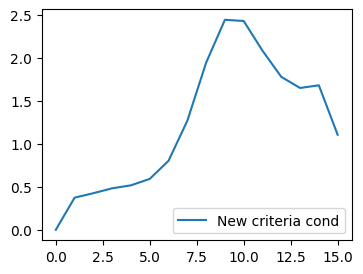

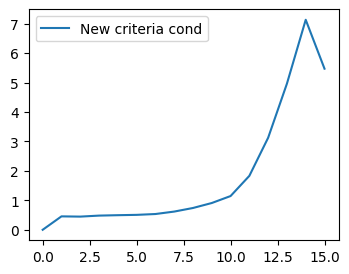

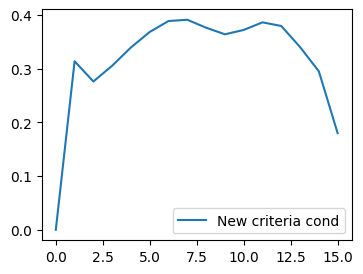

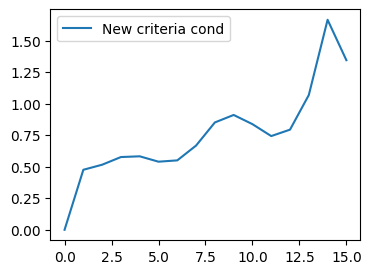

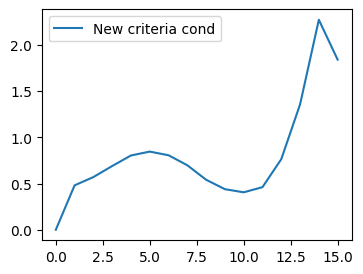

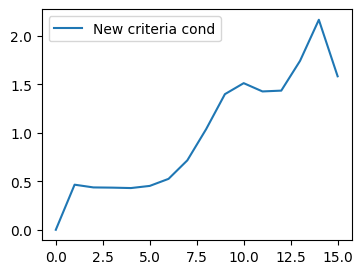

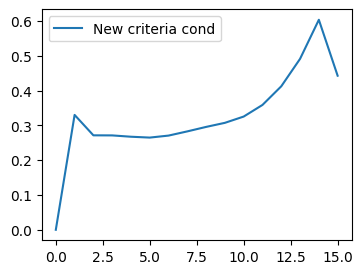

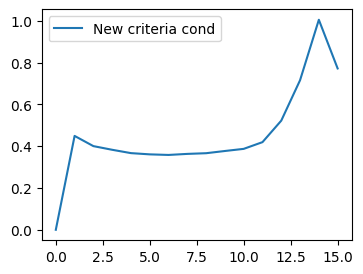

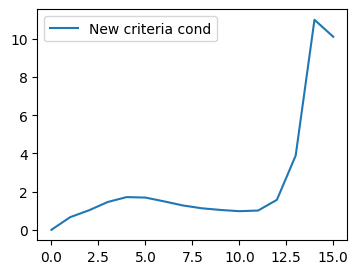

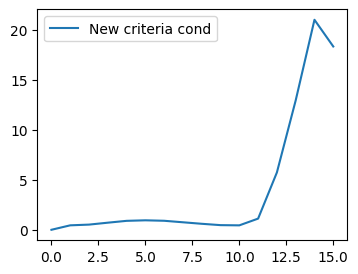

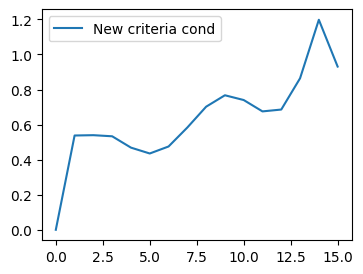

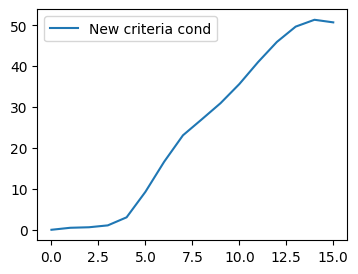

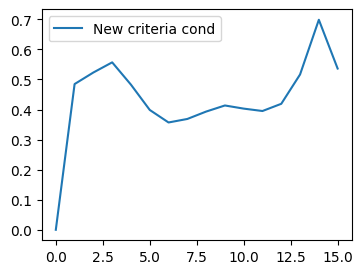

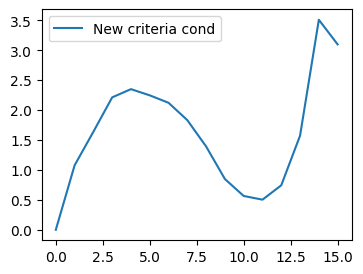

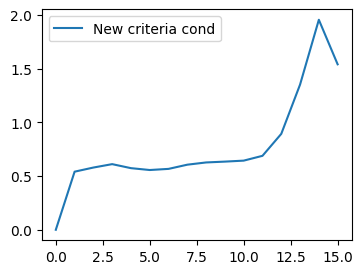

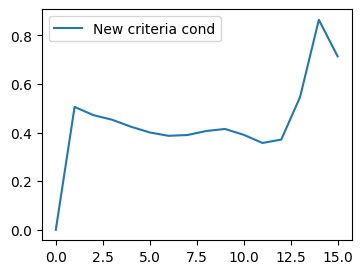

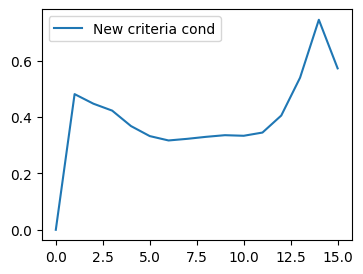

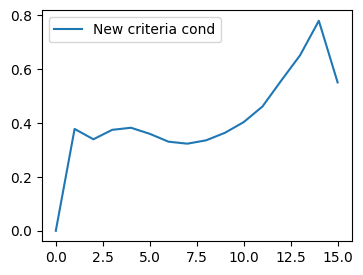

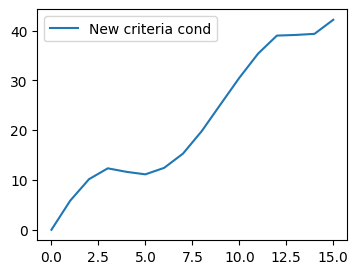

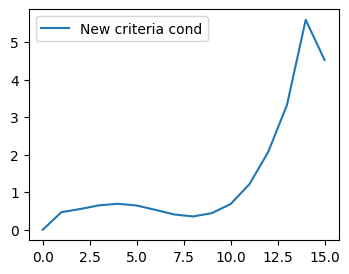

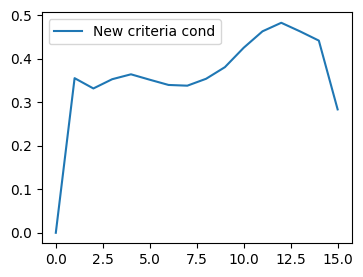

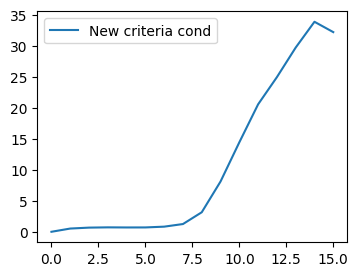

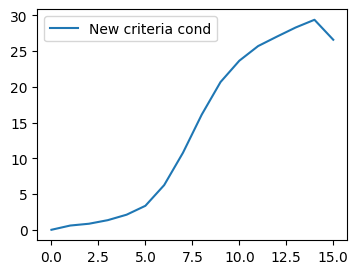

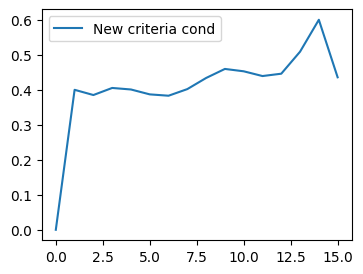

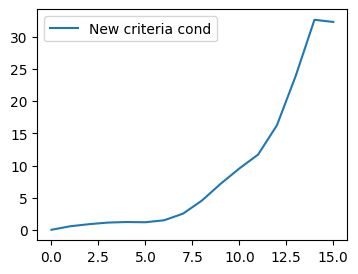

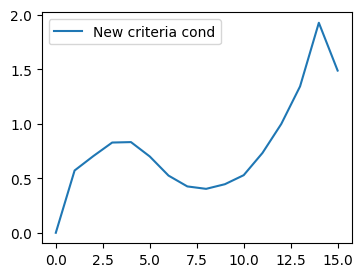

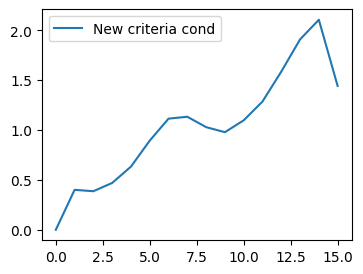

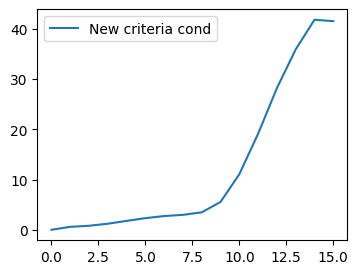

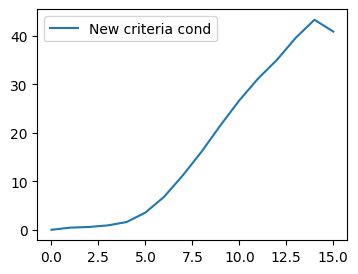

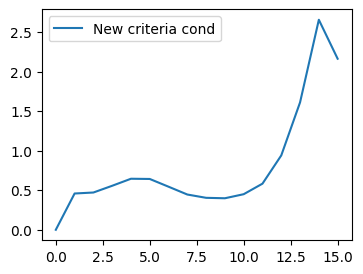

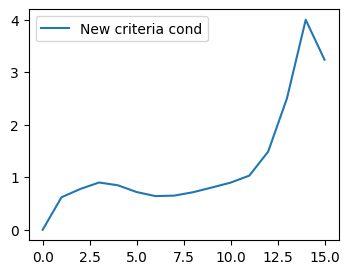

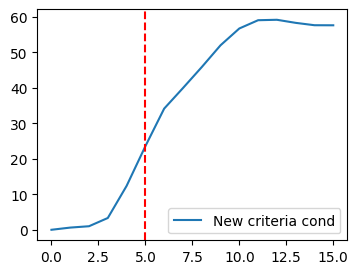

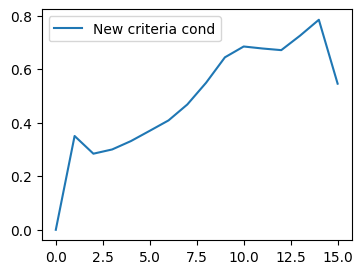

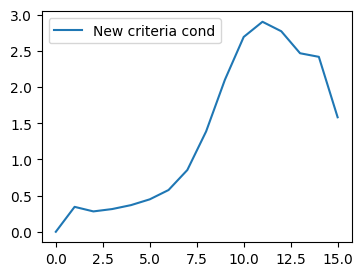

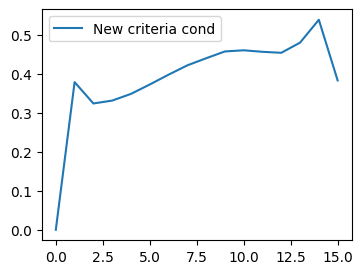

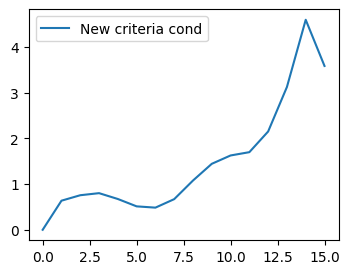

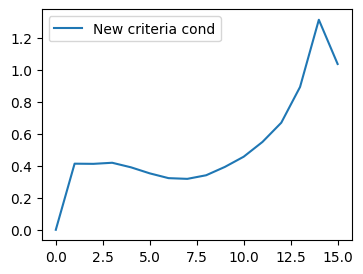

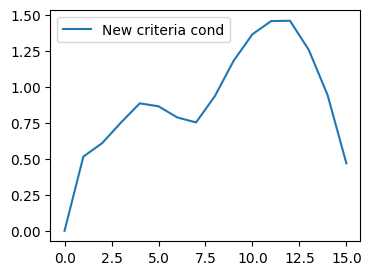

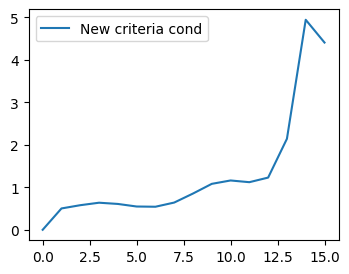

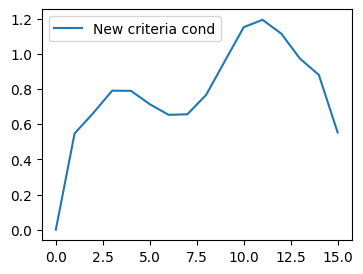

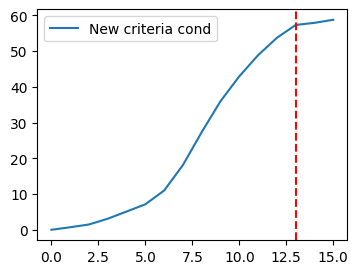

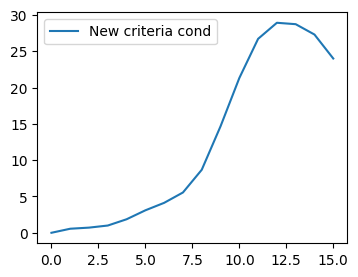

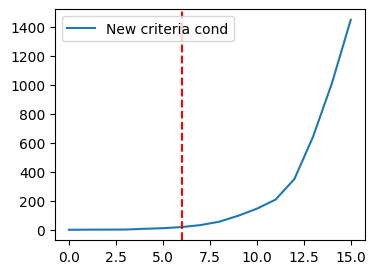

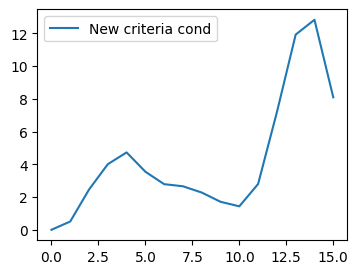

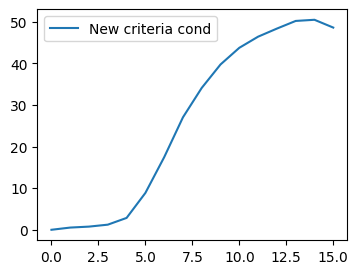

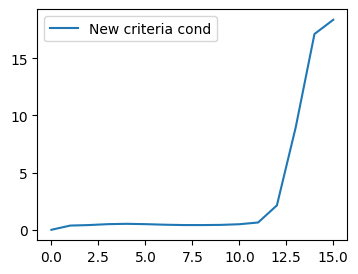

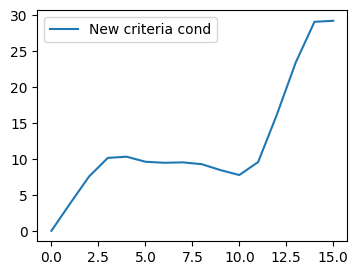

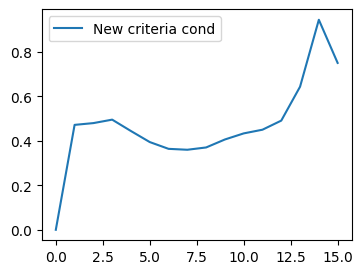

In [29]:
for IDX in range(48):
    change_idx = labels_batch[IDX].detach().cpu().numpy().argmax()

    plt.figure(figsize=(4, 3))
    #plt.plot(cusum_old[IDX], label="Old CUSUM")
    #plt.plot(cusum_correct_noncond[IDX], label="Correct CUSUM non-cond")
    #plt.plot(cusum_correct_cond[IDX], label="New CUSUM cond")
    #plt.plot(new_crit_noncond[IDX], label="New criteria non-cond")
    plt.plot(new_crit_cond[IDX], label="New criteria cond")

    if change_idx > 0:
        plt.axvline(x = change_idx, c="red", linestyle="--")
    plt.legend()
    plt.show()

In [15]:
class OutputDataset(Dataset):
    """Fake dataset to store pre-computed all models' outputs for MMD model evaluation."""

    def __init__(self, test_out_bank, test_uncertainties_bank, test_labels_bank):
        super().__init__()
        
        # every prediction is (batch_size, seq_len)
        self.test_out = list(torch.vstack(test_out_bank))
                
        self.test_labels = list(torch.vstack(test_labels_bank))
        
        self.test_uncertainties = list(torch.vstack(test_uncertainties_bank))  

    def __len__(self):
        return len(self.test_labels)

    def __getitem__(self, idx):
        return (self.test_out[idx], self.test_uncertainties[idx]), self.test_labels[idx]
    
class AllModelsOutputDataset(Dataset):
    """Fake dataset to store pre-computed all models' outputs for MMD model evaluation."""

    def __init__(self, test_out_bank, test_labels_bank):
        super().__init__()
        
        # every prediction is (n_models, batch_size, seq_len)
        self.test_out = list(torch.hstack(test_out_bank).transpose(0, 1))
                
        self.test_labels = list(torch.vstack(test_labels_bank))
        
    def __len__(self):
        return len(self.test_labels)

    def __getitem__(self, idx):
        return self.test_out[idx], self.test_labels[idx]

In [16]:
# collecting outputs
test_out_bank, test_uncertainties_bank, test_labels_bank = metrics.collect_model_predictions_on_set(
    ens_bce,
    test_dataloader,
    model_type="ensemble",
    device="cuda"
)

out_dataset = OutputDataset(test_out_bank, test_uncertainties_bank, test_labels_bank)
out_dataloader = DataLoader(out_dataset, batch_size=128, shuffle=False)

(preds, stds), labels = out_dataset[0]
preds.shape, stds.shape, labels.shape

  0%|          | 0/7 [00:00<?, ?it/s]

Collectting model's outputs


100%|██████████| 7/7 [02:33<00:00, 21.91s/it]


(torch.Size([16]), torch.Size([16]), torch.Size([16]))

In [18]:
cusum_threshold_list = np.linspace(0, 10, 100)

metrics.evaluate_cusum_ensemble_model(
    cusum_threshold_list=cusum_threshold_list,
    output_dataloader=out_dataloader,
    margin_list=[1, 2, 4],
    args_config=args_config,
    n_models=10,
    save_path=path_to_models_folder,
    cusum_mode="old",
    conditional=True,
    global_sigma=global_sigma,
    lambda_null=lambda_null,
    lambda_inf=lambda_inf,
    half_wnd=half_wnd,
    device="cpu",
    verbose=True,
);

100%|██████████| 100/100 [10:07<00:00,  6.08s/it]

Results for best threshold = 4.848484848484849
AUDC: 0.0, Time to FA: 15.8159, DD: 0.2317, F1: 0.6667, Cover: 0.986, Max Cover: 0.986
Max F1 with margin 1: 0.4762
Max F1 with margin 2: 0.4762
Max F1 with margin 4: 0.4762


In [23]:
cusum_threshold_list = np.linspace(0, 500, 100)

metrics.evaluate_cusum_ensemble_model(
    cusum_threshold_list=cusum_threshold_list,
    output_dataloader=out_dataloader,
    margin_list=[1, 2, 4],
    args_config=args_config,
    n_models=10,
    save_path=path_to_models_folder,
    cusum_mode="correct",
    conditional=False,
    global_sigma=global_sigma,
    lambda_null=lambda_null,
    lambda_inf=lambda_inf,
    half_wnd=half_wnd,
    device="cpu",
    verbose=True,
);

100%|██████████| 100/100 [10:43<00:00,  6.44s/it]

Results for best threshold = 161.6161616161616
AUDC: 0.0, Time to FA: 15.7016, DD: 0.2095, F1: 0.7143, Cover: 0.9814, Max Cover: 0.9814
Max F1 with margin 1: 0.1053
Max F1 with margin 2: 0.4348
Max F1 with margin 4: 0.6154


In [25]:
cusum_threshold_list = np.linspace(0, 500, 100)

metrics.evaluate_cusum_ensemble_model(
    cusum_threshold_list=cusum_threshold_list,
    output_dataloader=out_dataloader,
    margin_list=[1, 2, 4],
    args_config=args_config,
    n_models=10,
    save_path=path_to_models_folder,
    cusum_mode="correct",
    conditional=True,
    global_sigma=global_sigma,
    lambda_null=lambda_null,
    lambda_inf=lambda_inf,
    half_wnd=half_wnd,
    device="cpu",
    verbose=True,
);

100%|██████████| 100/100 [10:40<00:00,  6.41s/it]

Results for best threshold = 20.2020202020202
AUDC: 0.0, Time to FA: 15.7333, DD: 0.2159, F1: 0.72, Cover: 0.9857, Max Cover: 0.9857
Max F1 with margin 1: 0.5455
Max F1 with margin 2: 0.5455
Max F1 with margin 4: 0.6087


In [28]:
cusum_threshold_list = np.linspace(0, 500, 100)

metrics.evaluate_cusum_ensemble_model(
    cusum_threshold_list=cusum_threshold_list,
    output_dataloader=out_dataloader,
    margin_list=[1, 2, 4],
    args_config=args_config,
    n_models=10,
    save_path=path_to_models_folder,
    cusum_mode="new_criteria",
    conditional=False,
    global_sigma=global_sigma,
    lambda_null=lambda_null,
    lambda_inf=lambda_inf,
    half_wnd=half_wnd,
    device="cpu",
    verbose=True,
    #write_metrics_filename=path_to_metrics,
);

100%|██████████| 100/100 [10:14<00:00,  6.14s/it]

Results for best threshold = 202.02020202020202
AUDC: 0.0, Time to FA: 15.7079, DD: 0.2286, F1: 0.7143, Cover: 0.98, Max Cover: 0.98
Max F1 with margin 1: 0.1053
Max F1 with margin 2: 0.2
Max F1 with margin 4: 0.56


In [30]:
cusum_threshold_list = np.linspace(0, 500, 100)

metrics.evaluate_cusum_ensemble_model(
    cusum_threshold_list=cusum_threshold_list,
    output_dataloader=out_dataloader,
    margin_list=[1, 2, 4],
    args_config=args_config,
    n_models=10,
    save_path=path_to_models_folder,
    cusum_mode="new_criteria",
    conditional=True,
    global_sigma=global_sigma,
    lambda_null=lambda_null,
    lambda_inf=lambda_inf,
    half_wnd=half_wnd,
    device="cpu",
    verbose=True,
);

100%|██████████| 100/100 [10:18<00:00,  6.18s/it]

Results for best threshold = 75.75757575757575
AUDC: 0.0, Time to FA: 15.8095, DD: 0.254, F1: 0.6667, Cover: 0.9831, Max Cover: 0.9831
Max F1 with margin 1: 0.2222
Max F1 with margin 2: 0.4
Max F1 with margin 4: 0.6087
